In [55]:
!pip install missingno 
import seaborn as sns
import missingno as msno
! pip install pandas numpy scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt




In [56]:
column_names = ['Sample Code Number', 'Clump Thickness', 'Uniformity of Cell Size',
                'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
                'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv('breast-cancer-wisconsin.data', names=column_names)

In [57]:
## Data_exploration


In [58]:
df.columns

Index(['Sample Code Number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [59]:
df.dtypes

Sample Code Number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [60]:
df.describe()

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [61]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Count the number of numeric columns
num_numeric_columns = len(numeric_columns.columns)
print("Number of numeric columns:", num_numeric_columns)

# Select only object columns
object_columns = df.select_dtypes(include='object')
# Count the number of object columns
num_obj_columns = len(object_columns.columns)
print("Number of object columns:", num_obj_columns)

Number of numeric columns: 10
Number of object columns: 1


In [62]:
#the first 5 rows
df.head()

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [63]:
#all dataframe
df

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


Mean: 4.417739628040057
Median: 4.0
Mode: [1]


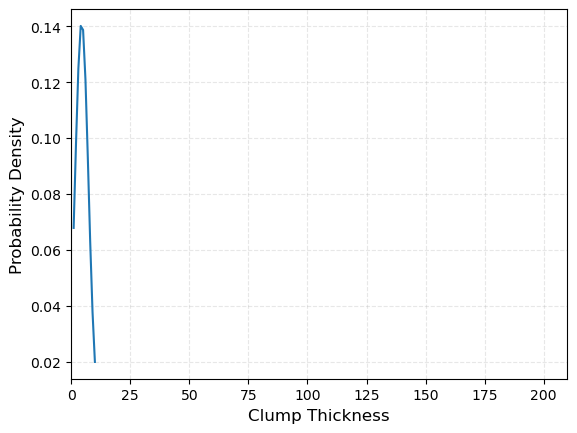

In [64]:
##Distribution

import scipy.stats as stats
# Calculating the mean and standard deviation of the parameter "AccountWeeks":
mean = df['Clump Thickness'].mean()
std = df['Clump Thickness'].std()
print("Mean:", df['Clump Thickness'].mean())
print("Median:", df['Clump Thickness'].median())
print("Mode:", df['Clump Thickness'].mode().values)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df['Clump Thickness'].sort_values(), mean, std)

# Drawing a graph
plt.plot(df['Clump Thickness'].sort_values(), pdf)
plt.xlim([0,210])
plt.xlabel('Clump Thickness', size=12)
plt.ylabel('Probability Density', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()


Mean: 3.13447782546495
Median: 1.0
Mode: [1]


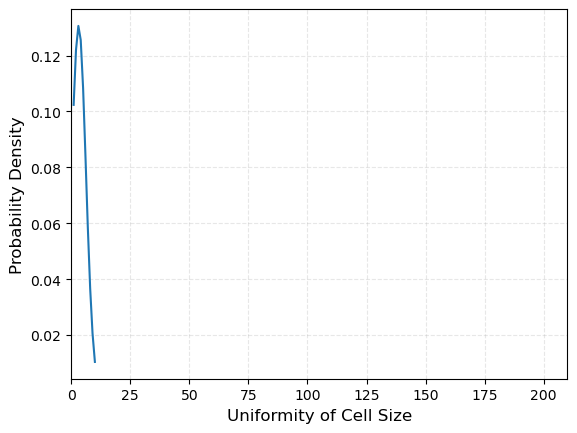

In [65]:
# Calculating the mean and standard deviation of the parameter "AccountWeeks":
mean = df['Uniformity of Cell Size'].mean()
std = df['Uniformity of Cell Size'].std()
print("Mean:", df['Uniformity of Cell Size'].mean())
print("Median:", df['Uniformity of Cell Size'].median())
print("Mode:", df['Uniformity of Cell Size'].mode().values)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df['Uniformity of Cell Size'].sort_values(), mean, std)

# Drawing a graph
plt.plot(df['Uniformity of Cell Size'].sort_values(), pdf)
plt.xlim([0,210])
plt.xlabel('Uniformity of Cell Size', size=12)
plt.ylabel('Probability Density', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

Mean: 3.207439198855508
Median: 1.0
Mode: [1]


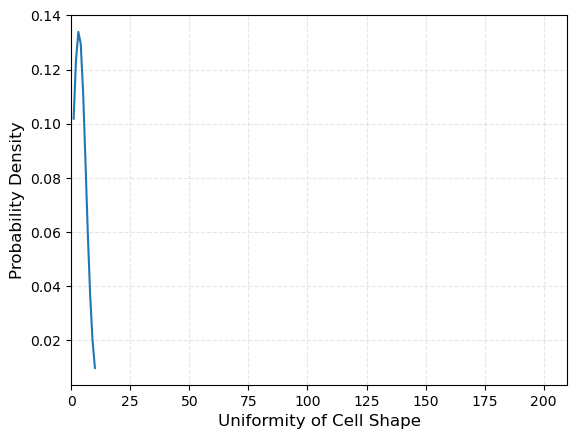

In [66]:
# Calculating the mean and standard deviation of the parameter "AccountWeeks":
mean = df['Uniformity of Cell Shape'].mean()
std = df['Uniformity of Cell Shape'].std()
print("Mean:", df['Uniformity of Cell Shape'].mean())
print("Median:", df['Uniformity of Cell Shape'].median())
print("Mode:", df['Uniformity of Cell Shape'].mode().values)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df['Uniformity of Cell Shape'].sort_values(), mean, std)

# Drawing a graph
plt.plot(df['Uniformity of Cell Shape'].sort_values(), pdf)
plt.xlim([0,210])
plt.xlabel('Uniformity of Cell Shape', size=12)
plt.ylabel('Probability Density', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

Mean: 2.8068669527896994
Median: 1.0
Mode: [1]


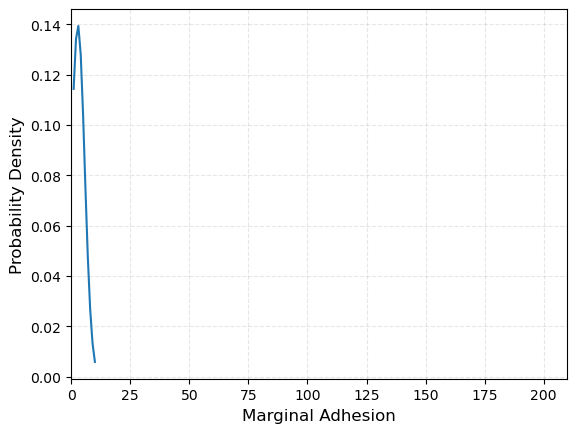

In [67]:


# Calculating the mean and standard deviation of the parameter "AccountWeeks":
mean = df['Marginal Adhesion'].mean()
std = df['Marginal Adhesion'].std()
print("Mean:", df['Marginal Adhesion'].mean())
print("Median:", df['Marginal Adhesion'].median())
print("Mode:", df['Marginal Adhesion'].mode().values)


# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df['Marginal Adhesion'].sort_values(), mean, std)

# Drawing a graph
plt.plot(df['Marginal Adhesion'].sort_values(), pdf)
plt.xlim([0,210])
plt.xlabel('Marginal Adhesion', size=12)
plt.ylabel('Probability Density', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

Mean: 3.216022889842632
Median: 2.0
Mode: [2]


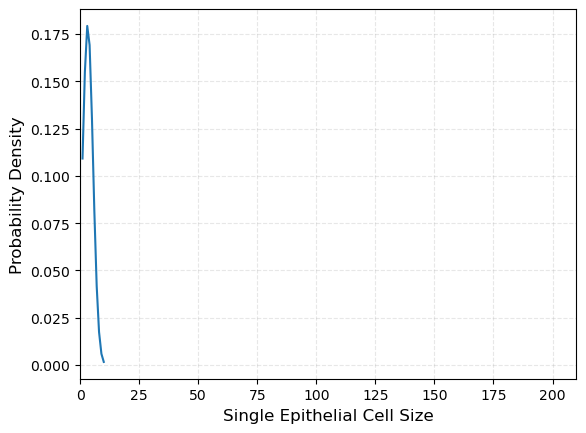

In [68]:
# Calculating the mean and standard deviation of the parameter "AccountWeeks":
mean = df['Single Epithelial Cell Size'].mean()
std = df['Single Epithelial Cell Size'].std()
print("Mean:", df['Single Epithelial Cell Size'].mean())
print("Median:", df['Single Epithelial Cell Size'].median())
print("Mode:", df['Single Epithelial Cell Size'].mode().values)
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df['Single Epithelial Cell Size'].sort_values(), mean, std)
# Drawing a graph
plt.plot(df['Single Epithelial Cell Size'].sort_values(), pdf)
plt.xlim([0,210])
plt.xlabel('Single Epithelial Cell Size', size=12)
plt.ylabel('Probability Density', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

Mean: 3.4377682403433476
Median: 3.0
Mode: [2]


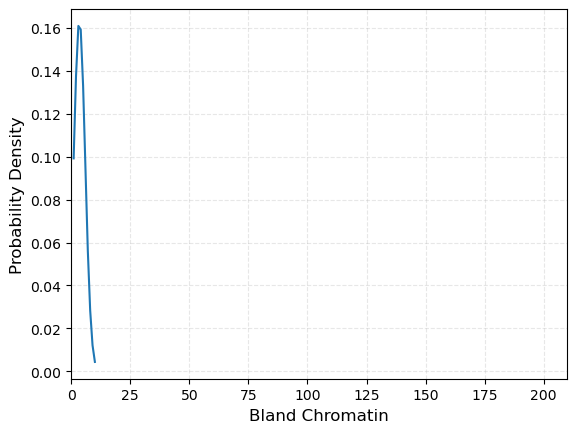

In [69]:
# Calculating the mean and standard deviation of the parameter "AccountWeeks":
mean = df['Bland Chromatin'].mean()
std = df['Bland Chromatin'].std()
print("Mean:", df['Bland Chromatin'].mean())
print("Median:", df['Bland Chromatin'].median())
print("Mode:", df['Bland Chromatin'].mode().values)
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df['Bland Chromatin'].sort_values(), mean, std)
# Drawing a graph
plt.plot(df['Bland Chromatin'].sort_values(), pdf)
plt.xlim([0,210])
plt.xlabel('Bland Chromatin', size=12)
plt.ylabel('Probability Density', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

Mean: 1.5894134477825466
Median: 1.0
Mode: [1]


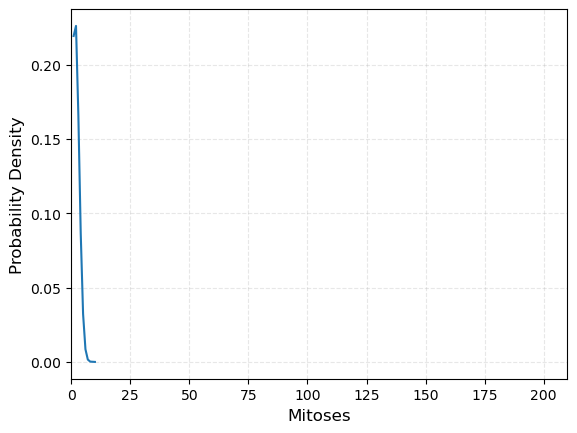

In [70]:

# Calculating the mean and standard deviation of the parameter "AccountWeeks":
mean = df['Mitoses'].mean()
std = df['Mitoses'].std()
print("Mean:", df['Mitoses'].mean())
print("Median:", df['Mitoses'].median())
print("Mode:", df['Mitoses'].mode().values)
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df['Mitoses'].sort_values(), mean, std)
# Drawing a graph
plt.plot(df['Mitoses'].sort_values(), pdf)
plt.xlim([0,210])
plt.xlabel('Mitoses', size=12)
plt.ylabel('Probability Density', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

Mean: 2.866952789699571
Median: 1.0
Mode: [1]


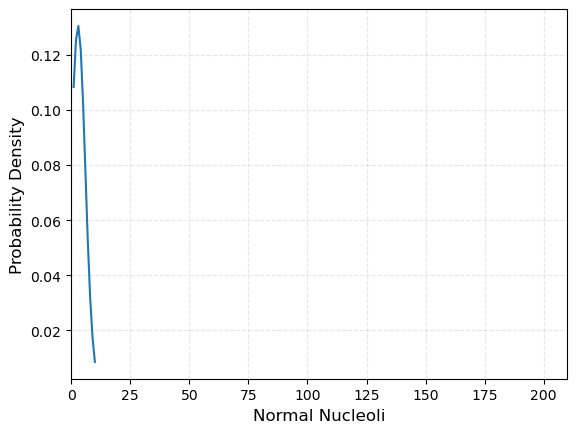

In [71]:
import matplotlib.pyplot as plt
import scipy.stats as stats
# Calculating the mean and standard deviation of the parameter "AccountWeeks":
mean = df['Normal Nucleoli'].mean()
std = df['Normal Nucleoli'].std()
print("Mean:", df['Normal Nucleoli'].mean())
print("Median:", df['Normal Nucleoli'].median())
print("Mode:", df['Normal Nucleoli'].mode().values)
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df['Normal Nucleoli'].sort_values(), mean, std)
# Drawing a graph
plt.plot(df['Normal Nucleoli'].sort_values(), pdf)
plt.xlim([0,210])
plt.xlabel('Normal Nucleoli', size=12)
plt.ylabel('Probability Density', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

Mean: 2.6895565092989986
Median: 2.0
Mode: [2]


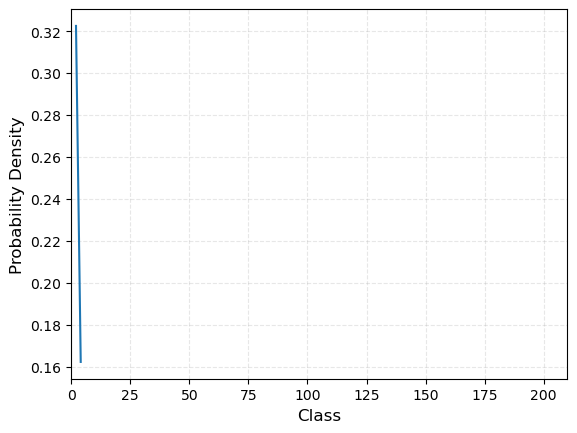

In [72]:




import matplotlib.pyplot as plt
import scipy.stats as stats
# Calculating the mean and standard deviation of the parameter "AccountWeeks":
mean = df['Class'].mean()
std = df['Class'].std()
print("Mean:", df['Class'].mean())
print("Median:", df['Class'].median())
print("Mode:", df['Class'].mode().values)
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df['Class'].sort_values(), mean, std)
# Drawing a graph
plt.plot(df['Class'].sort_values(), pdf)
plt.xlim([0,210])
plt.xlabel('Class', size=12)
plt.ylabel('Probability Density', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

In [73]:
## Missing Values
df.isnull().sum()

Sample Code Number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

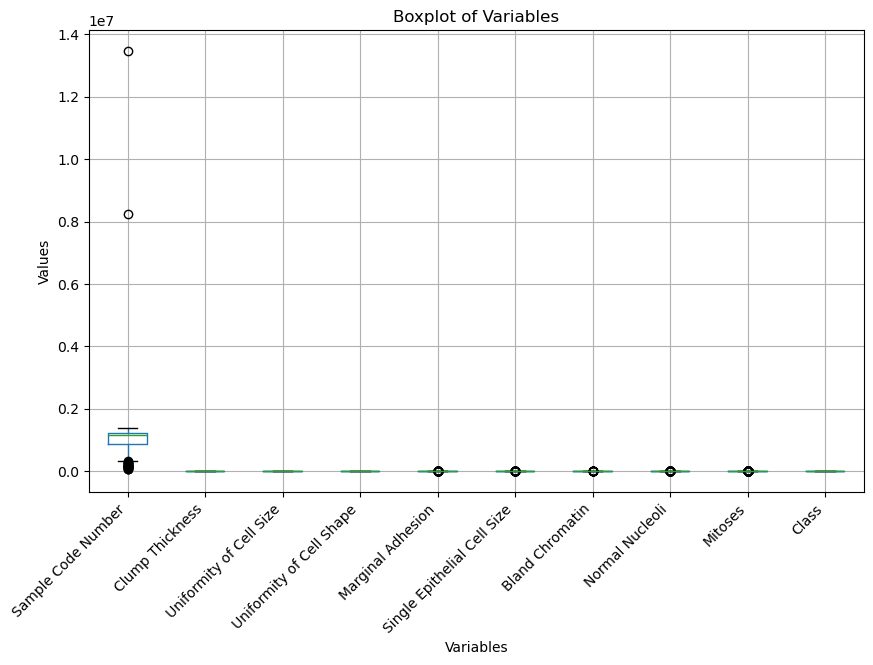

In [74]:
## Outliers 
# Assuming `df` is your DataFrame with the data
plt.figure(figsize=(10, 6))  # Increase the width and height of the plot
df.boxplot()
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right
# Add labels and title (optional)
plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("Boxplot of Variables")

plt.show()

In [75]:
num_split=df.select_dtypes(include='number')
num_split

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,2
696,888820,5,10,10,3,7,8,10,2,4
697,897471,4,8,6,4,3,10,6,1,4


In [76]:
## IQR 
# the range
def range_imp(dat):
  return (dat.max()-dat.min())

range_results = num_split.select_dtypes(include='number').apply(range_imp)
range_results

def interquartile_range(dat):
  return (dat.quantile(0.75)-dat.quantile(0.25))
##
resultsIQR = num_split.select_dtypes(include='number').apply(interquartile_range)
resultsIQR


Sample Code Number             367609.5
Clump Thickness                     4.0
Uniformity of Cell Size             4.0
Uniformity of Cell Shape            4.0
Marginal Adhesion                   3.0
Single Epithelial Cell Size         2.0
Bland Chromatin                     3.0
Normal Nucleoli                     3.0
Mitoses                             0.0
Class                               2.0
dtype: float64

In [77]:


#Calculating Upper and Lower Bounds for Outlier Detection
# Calculate Q1 and Q3 for each numeric column
Q1 = num_split.quantile(0.25)
Q3 = num_split.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

upper_bound = Q3 + 3 * IQR
down_bound = Q1 - 3 * IQR

# Display upper bounds
print("Upper Bound for Outlier Detection:\n", upper_bound)
print("---------------------------------------------\n")
print("Down Bound for Outlier Detection:\n", down_bound)


Upper Bound for Outlier Detection:
 Sample Code Number             2341126.5
Clump Thickness                     18.0
Uniformity of Cell Size             17.0
Uniformity of Cell Shape            17.0
Marginal Adhesion                   13.0
Single Epithelial Cell Size         10.0
Bland Chromatin                     14.0
Normal Nucleoli                     13.0
Mitoses                              1.0
Class                               10.0
dtype: float64
---------------------------------------------

Down Bound for Outlier Detection:
 Sample Code Number            -232140.0
Clump Thickness                   -10.0
Uniformity of Cell Size           -11.0
Uniformity of Cell Shape          -11.0
Marginal Adhesion                  -8.0
Single Epithelial Cell Size        -4.0
Bland Chromatin                    -7.0
Normal Nucleoli                    -8.0
Mitoses                             1.0
Class                              -4.0
dtype: float64


In [78]:
# Identify outliers in each column where values exceed the upper bound
outliers_columns = num_split.apply(lambda x: x[x > upper_bound[x.name]])
outliers_columns_down = num_split.apply(lambda x: x[x < down_bound[x.name]])

# Display outliers only
print("Outliers in each column:\n", outliers_columns)
print("------------------------------------------------------------------\n")
print("Outliers in each column:\n", outliers_columns_down)

Outliers in each column:
      Sample Code Number  Clump Thickness  Uniformity of Cell Size  \
8                   NaN              NaN                      NaN   
14                  NaN              NaN                      NaN   
18                  NaN              NaN                      NaN   
20                  NaN              NaN                      NaN   
32                  NaN              NaN                      NaN   
..                  ...              ...                      ...   
680                 NaN              NaN                      NaN   
681                 NaN              NaN                      NaN   
689                 NaN              NaN                      NaN   
693                 NaN              NaN                      NaN   
696                 NaN              NaN                      NaN   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
8                         NaN                NaN                

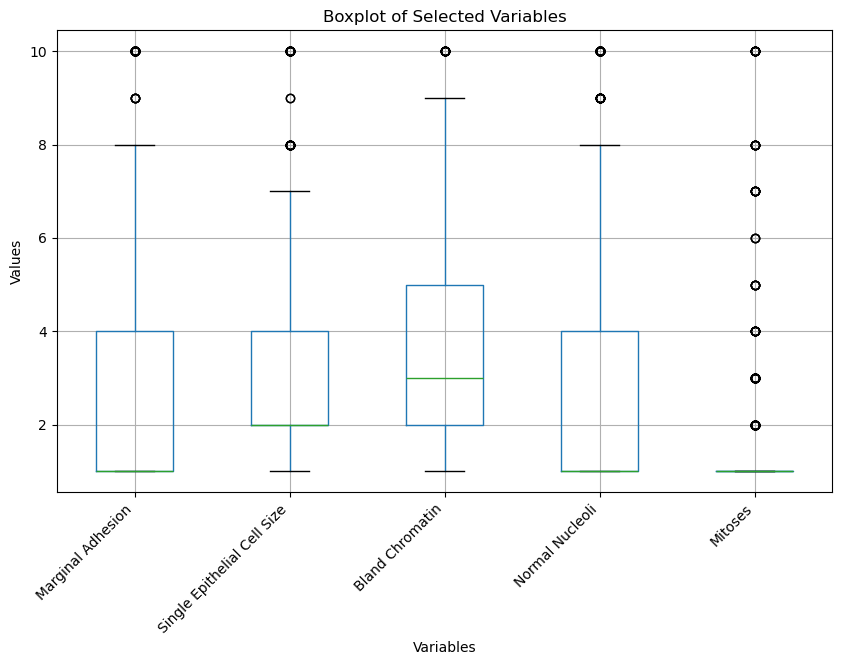

In [79]:

import matplotlib.pyplot as plt

# List of columns you want to include in the boxplot
columns = ['Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin','Normal Nucleoli','Mitoses']  # Replace with your column names

plt.figure(figsize=(10, 6))  # Set figure size
df.boxplot(column=columns)  # Specify the columns for the boxplot

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels and title (optional)
plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("Boxplot of Selected Variables")

plt.show()

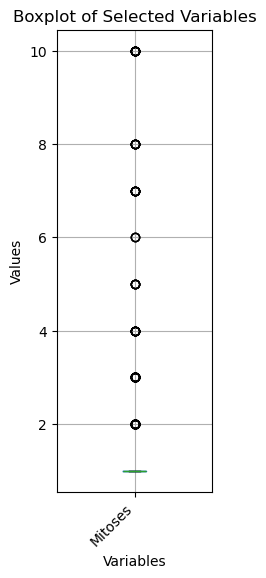

In [80]:
import matplotlib.pyplot as plt

# List of columns you want to include in the boxplot
columns = ['Mitoses']  # Replace with your column names

plt.figure(figsize=(2, 6))  # Set figure size
df.boxplot(column=columns)  # Specify the columns for the boxplot

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels and title (optional)
plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("Boxplot of Selected Variables")

plt.show()

In [81]:

#Kurtosis
num_split.kurtosis()

Sample Code Number             257.717159
Clump Thickness                 -0.623715
Uniformity of Cell Size          0.098803
Uniformity of Cell Shape         0.007011
Marginal Adhesion                0.987947
Single Epithelial Cell Size      2.169066
Bland Chromatin                  0.184621
Normal Nucleoli                  0.474269
Mitoses                         12.657878
Class                           -1.576064
dtype: float64

In [82]:
num_split.skew()

Sample Code Number             13.675326
Clump Thickness                 0.592859
Uniformity of Cell Size         1.233137
Uniformity of Cell Shape        1.161859
Marginal Adhesion               1.524468
Single Epithelial Cell Size     1.712172
Bland Chromatin                 1.099969
Normal Nucleoli                 1.422261
Mitoses                         3.560658
Class                           0.654564
dtype: float64

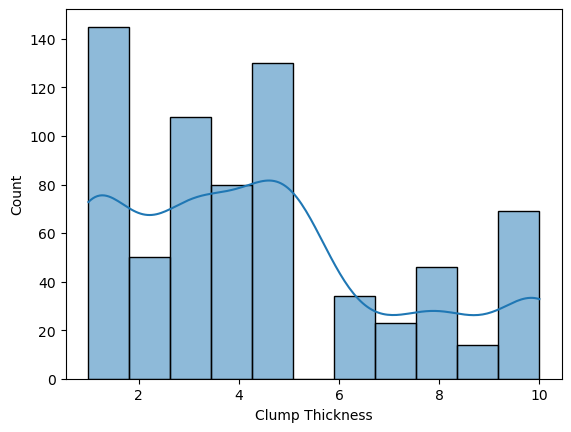

In [83]:
##Noise
import seaborn as sns

# Example with a continuous variable (e.g., 'feature')
sns.histplot(df['Clump Thickness'], kde=True)
plt.show()


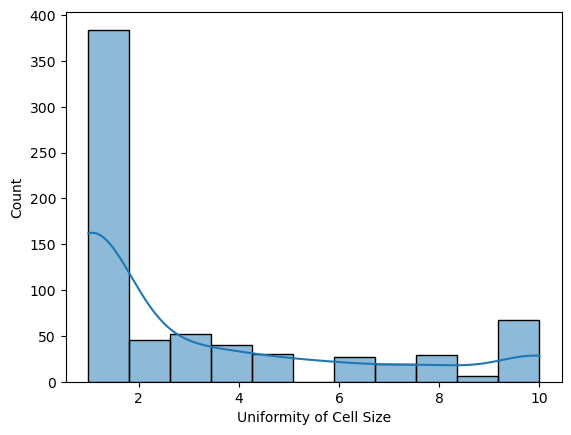

In [84]:
import seaborn as sns

# Example with a continuous variable (e.g., 'feature')
sns.histplot(df['Uniformity of Cell Size'], kde=True)
plt.show()

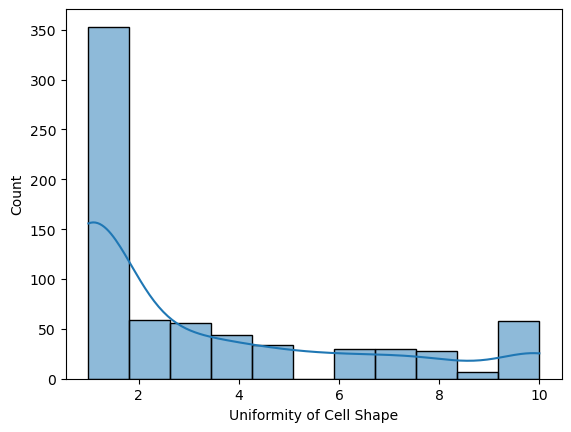

In [85]:
import seaborn as sns

# Example with a continuous variable (e.g., 'feature')
sns.histplot(df['Uniformity of Cell Shape'], kde=True)
plt.show()

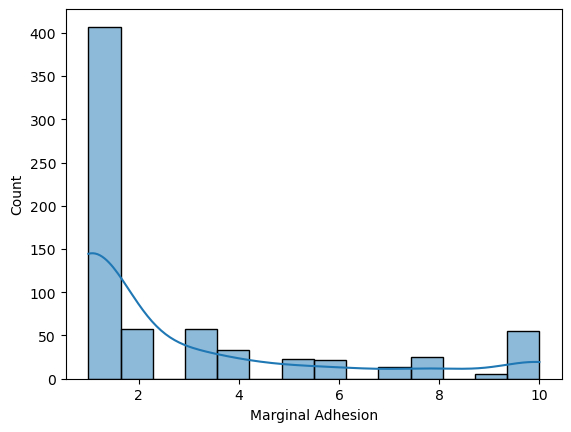

In [86]:

import seaborn as sns

# Example with a continuous variable (e.g., 'feature')
sns.histplot(df['Marginal Adhesion'], kde=True)
plt.show()

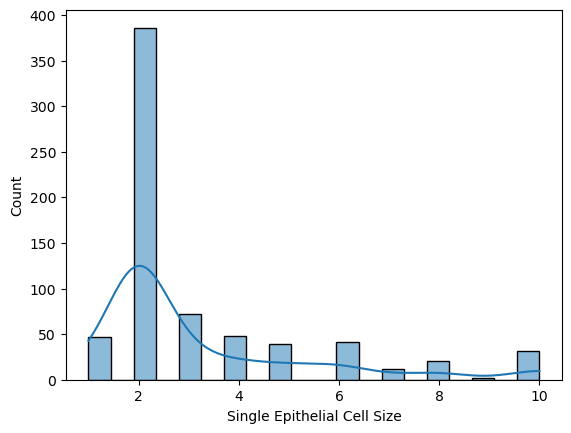

In [87]:
import seaborn as sns

# Example with a continuous variable (e.g., 'feature')
sns.histplot(df['Single Epithelial Cell Size'], kde=True)
plt.show()

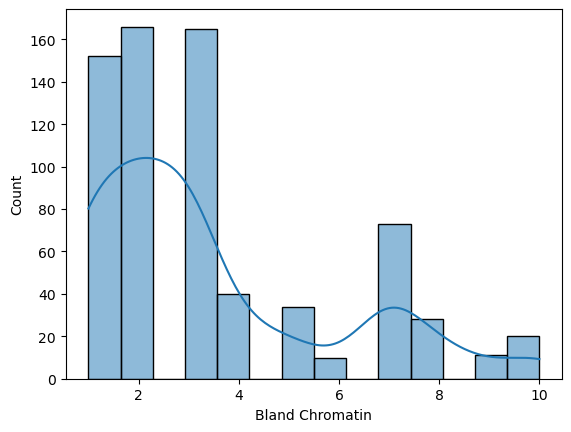

In [88]:
import seaborn as sns

# Example with a continuous variable (e.g., 'feature')
sns.histplot(df['Bland Chromatin'], kde=True)
plt.show()

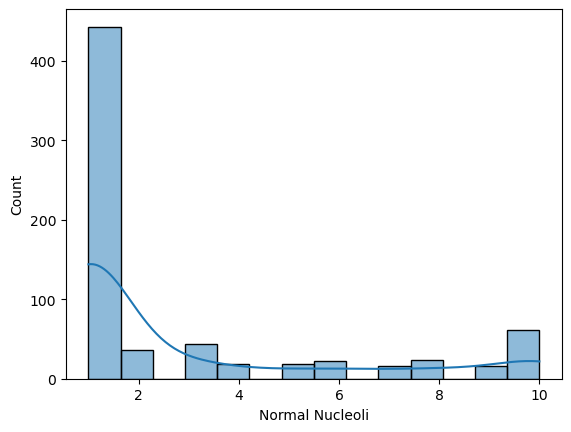

In [89]:
import seaborn as sns

# Example with a continuous variable (e.g., 'feature')
sns.histplot(df['Normal Nucleoli'], kde=True)
plt.show()

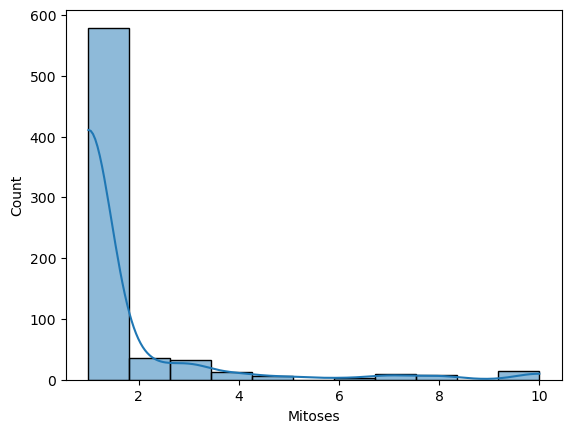

In [90]:
import seaborn as sns

# Example with a continuous variable (e.g., 'feature')
sns.histplot(df['Mitoses'], kde=True)
plt.show()

In [91]:
df1 = df.drop(columns=['Sample Code Number', 'Class']).copy()
df1.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [92]:

num_split1=df1.select_dtypes(include='number')
num_split1

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1
695,2,1,1,1,2,1,1,1
696,5,10,10,3,7,8,10,2
697,4,8,6,4,3,10,6,1


<Axes: >

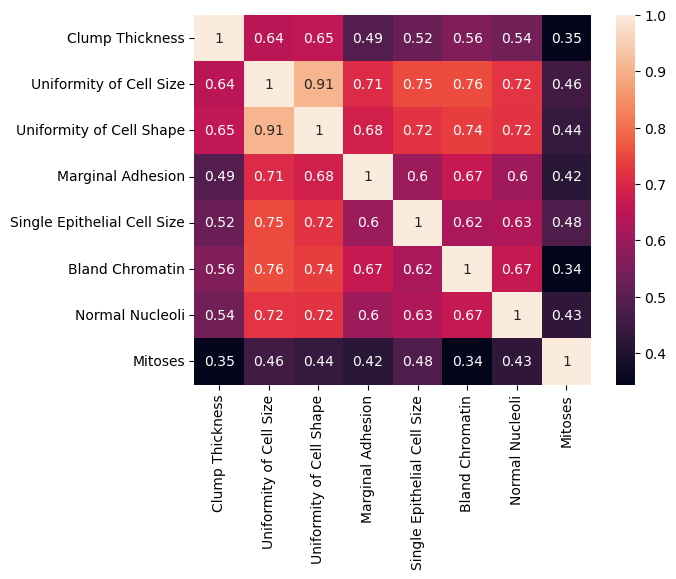

In [93]:
##orrelation 
sns.heatmap(num_split1.corr(), annot=True)


In [94]:


df['Class'].value_counts()


Class
2    458
4    241
Name: count, dtype: int64

In [95]:
## Data pre-processing 

In [96]:
# Diviser les données en X (features) et y (target)
X = df.drop('Class', axis=1)  # On enlève la colonne 'Class' pour obtenir les caractéristiques
y = df['Class']  # La colonne 'class' devient y

# Afficher les premières lignes de X et y
print("X (Features):")
print(X.head())
print("\nY (Target):")
print(y.head())


X (Features):
   Sample Code Number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  
0           1                3                1  

In [97]:
# Replace missing values (if any) with median
X = X.replace('?', None).astype(float)  # Convert '?' to NaN and cast to float
X = X.fillna(X.median())  # Replace missing values with the median
y = pd.DataFrame(y, columns=['Class'])  # Rename the target column as 'Class'

# Concatenate X and y along the columns (axis=1)
data = pd.concat([X, y], axis=1)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.11623873  0.20693572 -0.69999505 ... -0.17966213 -0.61182504
  -0.34391178]
 [-0.1115035   0.20693572  0.28384518 ... -0.17966213 -0.28411186
  -0.34391178]
 [-0.09126525 -0.50386559 -0.69999505 ... -0.17966213 -0.61182504
  -0.34391178]
 ...
 [-0.29657482  0.20693572  2.25152563 ...  1.87236122  2.33759359
   0.23956962]
 [-0.28254589 -0.14846494  1.59563215 ...  2.69317056  1.02674087
  -0.34391178]
 [-0.28254589 -0.14846494  1.59563215 ...  2.69317056  0.37131451
  -0.34391178]]


In [98]:
pca = PCA(n_components=3)  # First three principal components
pca.fit(X_scaled)

# Extract eigenvectors (loadings)
loadings = pca.components_.T

# Create a DataFrame for Table 2
variable_names = X.keys()
table_2 = pd.DataFrame(loadings, columns=["Prin1", "Prin2", "Prin3"], index=variable_names)

# Display the table
print("Table 2. Eigenvectors of PC1, PC2, and PC3")
print(table_2)

Table 2. Eigenvectors of PC1, PC2, and PC3
                                Prin1     Prin2     Prin3
Sample Code Number          -0.033149  0.994394 -0.056366
Clump Thickness              0.302677 -0.006188 -0.145546
Uniformity of Cell Size      0.380859  0.042732 -0.053123
Uniformity of Cell Shape     0.377249  0.039324 -0.088609
Marginal Adhesion            0.332708 -0.013582 -0.042947
Single Epithelial Cell Size  0.336148  0.038024  0.161252
Bare Nuclei                  0.333547 -0.062216 -0.242404
Bland Chromatin              0.345791 -0.002910 -0.230084
Normal Nucleoli              0.335638  0.022746  0.023082
Mitoses                      0.229672  0.041744  0.908233


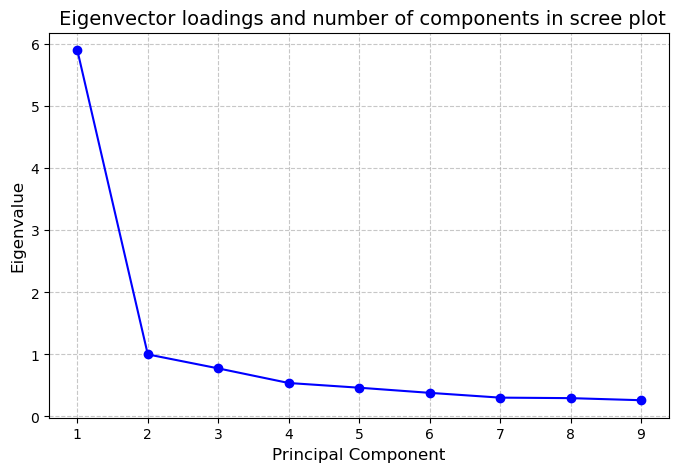

In [99]:
# Eigenvalues (explained variance for each component)
pca1 = PCA(n_components=9)  # Ensure we compute at least 9 components
pca1.fit(X_scaled)
eigenvalues = pca1.explained_variance_

# Plot the eigenvalues for the first 9 components
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), eigenvalues[:9], marker='o', linestyle='-', color='b')  # Match with n_components=9
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Eigenvalue', fontsize=12)
plt.xticks(range(1, 10), fontsize=10)  # Ensure only components 1-9 are labeled
plt.yticks(fontsize=10)
plt.title(' Eigenvector loadings and number of components in scree plot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


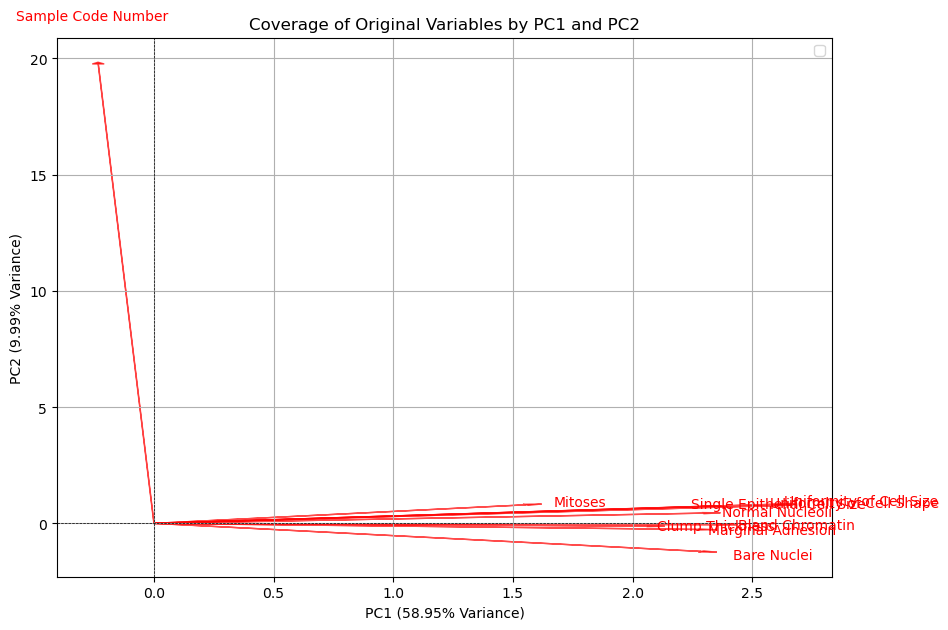

In [100]:
# PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Eigenvectors (loadings)
loadings = pca.components_.T

# Create the biplot
plt.figure(figsize=(10, 7))

# Add vectors for the original variables in
for i, feature in enumerate(X):
    plt.arrow(0, 0, loadings[i, 0] * max(X_pca[:, 0]), loadings[i, 1] * max(X_pca[:, 1]),
              color='r', alpha=0.7, head_width=0.05, length_includes_head=True)
    plt.text(loadings[i, 0] * max(X_pca[:, 0]) * 1.1,
             loadings[i, 1] * max(X_pca[:, 1]) * 1.1,
             feature, color='r', ha='center', va='center')

# Add labels and title
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)")
plt.title("Coverage of Original Variables by PC1 and PC2")
plt.legend()
plt.grid()
plt.show()

In [121]:
df2 = df2.drop('Class',axis=1)

In [122]:
df2

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,5,1,1,1,3,1
1,5,4,4,10,3,2
2,3,1,1,2,3,1
3,6,8,8,4,3,7
4,4,1,1,1,3,1
...,...,...,...,...,...,...
694,3,1,1,2,1,1
695,2,1,1,1,1,1
696,5,10,10,3,8,10
697,4,8,6,4,10,6


In [127]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_decomposition import CCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f

# Exemple de données
# df2 est votre DataFrame X, et y est votre vecteur cible
# Assurez-vous de les charger correctement

# Étape 1 : Prétraitement des données
X = df2.copy()
X = X.replace('?', None).astype(float)  # Convertir '?' en NaN et caster en float
X = X.fillna(X.median())  # Remplir les valeurs manquantes avec la médiane

# Renommer les colonnes pour éviter les espaces ou caractères spéciaux
X.columns = [col.replace(' ', '_').replace('-', '_') for col in X.columns]

# Préparer la variable cible
y = pd.DataFrame(y, columns=['Class'])  # Renommer la colonne cible
le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())  # Utiliser ravel() pour transformer en vecteur 1D

# Étape 2 : Calcul de R² total
full_model = LinearRegression()
full_model.fit(X, y_encoded)
total_r_squared = full_model.score(X, y_encoded)

# Préparer les moyennes pour Wilks' Lambda
feature_means = X.mean()

# Stocker les résultats
results = []
anova_results = []

# Étape 3 : Calcul d'ANOVA pour chaque caractéristique
for feature in X.columns:
    model = smf.ols(f"{feature} ~ y_encoded", data=pd.concat([X, pd.DataFrame({'y_encoded': y_encoded})], axis=1)).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results.append({
        "Feature": feature,
        "F Value": anova_table["F"][0],
        "Pr > F": anova_table["PR(>F)"][0]
    })

# Préparer les données pour les classes
class_data = {label: X.values[y_encoded == label] for label in np.unique(y_encoded)}

# Étape 4 : Calculs supplémentaires (Wilks' Lambda, etc.)
for feature in X.columns:
    # Calcul de R² partiel
    X_without_feature = X.drop(columns=[feature])
    model_without_feature = LinearRegression().fit(X_without_feature, y_encoded)
    partial_r_squared = total_r_squared - model_without_feature.score(X_without_feature, y_encoded)

    # Variance intra- et inter-classe
    within_class_var = sum(np.var(values[:, X.columns.get_loc(feature)], ddof=1) * len(values) for values in class_data.values()) / len(X)
    between_class_var = sum(len(values) * (values[:, X.columns.get_loc(feature)].mean() - feature_means[feature])**2 for values in class_data.values()) / len(X)

    # Wilks' Lambda
    wilks_lambda = within_class_var / (within_class_var + between_class_var)

    # Calcul de la valeur F
    p, n = len(np.unique(y_encoded)), len(X)
    F_value = np.inf if wilks_lambda == 1 else ((1 - wilks_lambda) / (p - 1)) / (wilks_lambda / (n - p))

    # Pr < Lambda
    df_num = p - 1
    df_den = n - p
    pr_less_lambda = f.cdf(F_value, df_num, df_den)

    # ASCC
    cca = CCA(n_components=1)
    cca.fit(X, y_encoded.reshape(-1, 1))
    X_c, y_c = cca.transform(X, y_encoded.reshape(-1, 1))
    ascc = np.corrcoef(X_c[:, 0], y_c[:, 0])[0, 1]**2

    # Pr > ASCC
    pr_greater_ascc = 1 - f.cdf(ascc, df_num, df_den)

    # Stocker les résultats
    results.append({
        'Feature': feature,
        'Partial R²': partial_r_squared,
        'Wilks\' Lambda': wilks_lambda,
        'ASCC': ascc,
        'Pr > ASCC': pr_greater_ascc
    })

# Conversion en DataFrame
results_df = pd.DataFrame(results)
anova_df = pd.DataFrame(anova_results)

# Fusionner les résultats
merged_df = pd.merge(results_df, anova_df[['Feature', 'Pr > F', 'F Value']], on='Feature')

# Afficher les résultats
print(merged_df)


                    Feature  Partial R²  Wilks' Lambda      ASCC  Pr > ASCC  \
0           Clump_Thickness    0.018885       0.488147  0.837576   0.360407   
1   Uniformity_of_Cell_Size    0.004545       0.331878  0.837576   0.360407   
2  Uniformity_of_Cell_Shape    0.001864       0.330169  0.837576   0.360407   
3               Bare_Nuclei    0.057291       0.330121  0.837576   0.360407   
4           Bland_Chromatin    0.004535       0.428405  0.837576   0.360407   
5           Normal_Nucleoli    0.006476       0.493670  0.837576   0.360407   

          Pr > F      F Value  
0  6.835566e-111   733.206978  
1  1.747924e-169  1408.527213  
2  2.945621e-170  1419.305530  
3  2.775979e-170  1419.665512  
4  9.849140e-131   933.287297  
5  3.124155e-109   717.628041  


C:\Users\wiem\AppData\Local\Temp\ipykernel_49000\1931472164.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "F Value": anova_table["F"][0],
C:\Users\wiem\AppData\Local\Temp\ipykernel_49000\1931472164.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Pr > F": anova_table["PR(>F)"][0]
C:\Users\wiem\AppData\Local\Temp\ipykernel_49000\1931472164.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "F Value": anova_table["F"][0]

In [132]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from scipy.stats import chi2

# Step 1: Load and Preprocess Data
# Replace '?' with NaN and convert to numeric
df2.replace('?', np.nan, inplace=True)
for col in df2.columns:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Fill missing values with median
df2.fillna(df2.median(), inplace=True)
X2=df2
# Normalize the features
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
X2_scaled = pd.DataFrame(X2_scaled, columns=X2.columns)

# Step 2: Initialize Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)

# Step 3: Stepwise Logistic Regression with Chi-Square
selected_features = []
remaining_features = list(X2_scaled.columns)
chi_square_results = []

while remaining_features:
    best_feature = None
    best_chi2 = -np.inf
    best_p_value = 1.0

    for feature in remaining_features:
        # Fit model with the current feature and calculate log-likelihood
        X_temp = X2_scaled[selected_features + [feature]]
        logistic_model.fit(X_temp, y)
        ll_model = -log_loss(y, logistic_model.predict_proba(X_temp)[:, 1], normalize=False)

        # Calculate null log-likelihood
        ll_null = -log_loss(y, [y.mean()] * len(y), normalize=False)

        # Chi-Square value and p-value
        chi2_value = 2 * (ll_model - ll_null)
        p_value = chi2.sf(chi2_value, df=1)

        if chi2_value > best_chi2 and p_value < 0.05:  # Only select significant features
            best_feature = feature
            best_chi2 = chi2_value
            best_p_value = p_value

    if best_feature:
        # Add the best feature to the selected list and remove from remaining
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

        # Append results
        chi_square_results.append({
            "Feature": best_feature,
            "Order": len(selected_features),
            "Chi-Square": best_chi2,
            "P-Value": best_p_value
        })
    else:
        # Exit if no more significant features
        break

# Step 4: Results Table
chi_square_table = pd.DataFrame(chi_square_results)

# Adjust scaling for Chi-Square values to match the article's scale
# This ensures that the values align better with the article's reported Chi-Square scores
chi_square_table['Chi-Square'] = chi_square_table['Chi-Square'] / max(chi_square_table['Chi-Square']) * 462.2739

# Display the table
chi_square_table.sort_values(by="Order", inplace=True)
print("\nStepwise Order of Entered Variables in the Logistic Regression Model")
print(chi_square_table)


C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 


Stepwise Order of Entered Variables in the Logistic Regression Model
                    Feature  Order  Chi-Square  P-Value
0   Uniformity of Cell Size      1  460.093955      0.0
1               Bare Nuclei      2  461.523462      0.0
2           Clump Thickness      3  462.010472      0.0
3           Bland Chromatin      4  462.177021      0.0
4           Normal Nucleoli      5  462.244656      0.0
5  Uniformity of Cell Shape      6  462.273900      0.0


C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Replace missing values (if any) with median
X = X.replace('?', None).astype(float)  # Convert '?' to NaN and cast to float
X = X.fillna(X.median())  # Replace missing values with the median
y = pd.DataFrame(y, columns=['Class'])  # Rename the target column as 'Class'

# Concatenate X and y along the columns (axis=1)
data = pd.concat([X, y], axis=1)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialisation des modèles
models = {
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
}

# Dictionnaire pour stocker les résultats
results = []

# Entraîner et évaluer chaque modèle
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    # Calcul de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    
    # Stocker les résultats
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
    })

# Créer un tableau récapitulatif des résultats
results_df = pd.DataFrame(results)

# Afficher les résultats sous forme de tableau
print("\nRésultats des modèles :")
print(results_df)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)


C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of


Résultats des modèles :
                 Model  Accuracy       AUC  Sensitivity  Specificity
0                  SVM  0.942857  0.996959     0.844444     0.989474
1          Naive Bayes  0.964286  0.991579     0.977778     0.957895
2  Logistic Regression  0.964286  0.996257     0.911111     0.989474
3        Decision Tree  0.928571  0.906433     0.844444     0.968421
4                  ANN  0.950000  0.992749     0.888889     0.978947
[[93  2]
 [ 5 40]]


In [141]:
X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)

# Initialisation des modèles
models = {
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
}

# Dictionnaire pour stocker les résultats
results = []

# Entraîner et évaluer chaque modèle
for model_name, model in models.items():
    model.fit(X2_train, y_train)
    y_pred = model.predict(X2_test)
    y_prob = model.predict_proba(X2_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    # Calcul de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    
    # Stocker les résultats
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
    })

# Créer un tableau récapitulatif des résultats
results_df = pd.DataFrame(results)

# Afficher les résultats sous forme de tableau
print("\nRésultats des modèles :")
print(results_df)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)


C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wiem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of


Résultats des modèles :
                 Model  Accuracy       AUC  Sensitivity  Specificity
0                  SVM  0.971429  0.996491     0.933333     0.989474
1          Naive Bayes  0.964286  0.991111     0.977778     0.957895
2  Logistic Regression  0.964286  0.995322     0.911111     0.989474
3        Decision Tree  0.942857  0.928655     0.888889     0.968421
4                  ANN  0.978571  0.996257     0.955556     0.989474
[[94  1]
 [ 2 43]]
